# **5.1 주성분 분석을 통한 비지도 차원 축소**

**특성 선택과 특성 추출의 차이**
- *특성 선택: 원본 특성을 **유지**한다.*
- *특성 추출: **새로운** 특성 공간으로 데이터를 변환하거나 투영한다.*

<br>

**특성 추출**
- 차원 축소 관점에서는 대부분 **관련 있는 정보를 유지하면서 데이터를 압축하는 방법**
- **저장 공간 절약**
- 학습 알고리즘의 **계산 효율성 향상**
- 차원의 저주(curse of dimensionality) 문제 감소시켜 **예측 성능 향상**


## **5.1.1 주성분 분석의 주요 단계**

### **주성분 분석(Principal Component Analysis, PCA)**
- 비지도 선형 변환 기법
- 특성 추출과 차원 축소 용도로 사용
  - 탐색적 데이터 분석
  - 주식 거래 시장의 잡음 제거
  - 게놈(genome) 데이터
  - 유전자 발현(gene expression) 분석

<br>



#### **PCA를 사용한 차원 축소**
**[d차원의 x]**를 **[변환 행렬 W]**가 **[k차원의 z]**로 변환하여 **차원을 축소함**<br>

$$x = [x_{1}, x_{2}, \cdots, x_{d}], x \in \mathbb{R}^{d}$$ 

                                                                    d차원의 벡터 x

<br>

$$W \in \mathbb{R}^{d \times k}$$

                                                                d×k 차원의 변환 행렬 W
<br>

$$xW = z$$

                                                                          변환
<br>

$$z = [z_{1}, z_{2}, \cdots, z_{k}], z \in \mathbb{R}^{k}$$

                                                                      k차원의 벡터 z



<br>

이때 새로운 k차원의 부분 공간으로 변환하여 만들어진 첫번째 주성분이 **가장 큰 분산을 가진다.**<br>
주성분은 **직교좌표**로 표현된다.<br>

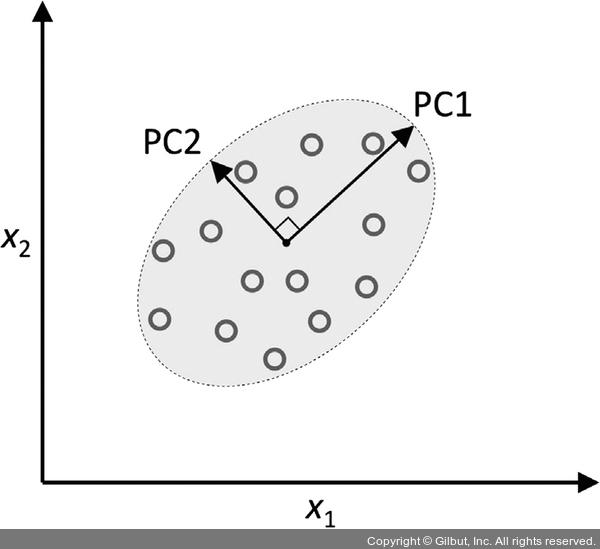


원본 특성 축: ```x_1, x_2```<br>
주성분: ```PC1, PC2```<br>
<br>


새로운 부분 공간의 **주성분(principal Component)**(직교좌표)은 주어진 조건에서 **분산이 가장 큰 방향**이다.<br>
*(분산 ```variance```: 샘플에 대한 예측이 얼마나 일정하게 퍼져 있는지)*<br><br>

PCA 방향은 데이터 스케일에 민감해서 **PCA를 적용하기 전에 특성을 표준화 전처리** 해야 한다.

**PCA 알고리즘의 7단계**
1. d 차원 데이터셋을 표준화 전처리한다.
2. 공분산 행렬(covariance matrix)을 만든다.
3. 공분산 행렬을 고유 벡터(eigenvector)와 고윳값(eigenvalue)으로 분해한다.
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매긴다.
5. 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다.(k<=d)
6. 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) W를 만든다.
7. 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환한다.

---

<br>



## **5.1.2 주성분 추출 단계**

7단계 중 4단계를 이번 절에서 살펴볼 것이다.
1. 데이터 표준화 전처리
2. 공분산 행렬 구성
3. 공분산 행렬의 고윳값과 고유 벡터를 구함
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다.

<br>


### **1단계: 데이터 표준화 전처리**

Wine dataset을 7:3 비율로 training set과 validation set으로 나누고, 표준화를 통해 **단위분산**을 갖도록 한다.<br>

**표준화**(Standardization): <br>
**분산을 1, 평균을 0**으로 만들어준다.*(**단위분산**: 분산이 1인 것)*<br>

$$x' = \frac {x - \bar{x}}{\sigma}$$

<br>


In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [2]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)
    
# 특성을 표준화 전처리한다.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

**```train_test_split```**은 훈련 데이터셋을 또 다시 **훈련 데이터셋(training set)**과 **검증 데이터셋(validation set)**으로 나눌 때 사용한다.<br>

**훈련 데이터셋을 한 번 더 나누는 이유**는 최종 테스트를 하기 전에 훈련한 데이터셋을 검증하면<br>
 **과대적합(overfitting)을 방지**하여 모델의 성능이 좋아지기 때문이다.<br>

               TRAINING SET           / TEST SET
      (Training set / Validation set) / TEST SET

<br>


```train_test_split```의 매개변수 ```stratify```는 **훈련 데이터셋과 테스트 데이터셋의 클래스 비율을 같게** 할지 정한다.<br>

```ex) 훈련 데이터셋의 True와 False 비율이 40:60이라면, 테스트 데이터셋의 True와 False 비율도 40:60으로 동일하다.``` <br>

**```stratify=y```**는 **비율을 동일하게 설정**한 것이다.

<br>


### **2단계: 공분산 행렬 구성**

**공분산 행렬(Σ):**
- d×d 차원의 대칭 행렬
- 특성 상호 간의 공분산을 저장한다.

<br>

**공분산(covariance)**: <br>
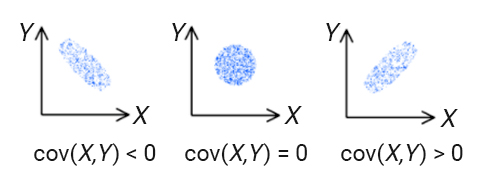

- **양의 공분산**: 두 특성의 **공분산이 양**이 되면, 특성이 **함께 증가하거나 감소**함
- **음의 공분산**: 두 특성의 **공분산이 음**이 되면, 특성이 **반대 방향으로 달라짐**

<br>

특성 j(```x_j```)와 특성 k(```x_k```) 사이의 공분산은 다음 식으로 계산 가능하다.

$$\sigma_{jk} = \frac{1}{n-1} \sum^{n}_{i = 1} (x^{(i)}_{j} - \mu_{j})(x^{(i)}_{k} - \mu_{k})$$

<br>

              특성 j와 특성 k 사이의 공분산 = 1/(n-1) sum(i=1부터 n까지){(i번째 특성 j - 특성 j의 샘플 평균)(i번째 특성 k - 특성 k의 샘플평균)}


<br>

특성 j와 k의 **샘플 평균(```μ_j, μ_k```)**: *표준화 전처리 했기 때문에 샘플 평균은 0이다.*
$$\mu_{j}, \mu_{k}$$


<br>
<br>

공분산 행렬 예시)<br>
*(Σ는 공분산 행렬을 나타낸다. 합 기호와 혼동하면 안됨)*

$$\sum = \begin{bmatrix}
\sigma^2_1 & \sigma_{12}  & \sigma_{13} \\ 
\sigma_{21} & \sigma^2_2  & \sigma_{23} \\ 
\sigma_{31} & \sigma_{32}  & \sigma^2_3 
\end{bmatrix} = \begin{bmatrix}
\sigma_1 \sigma_1 & \sigma_1 \sigma_2  & \sigma_1 \sigma_3 \\ 
\sigma_2 \sigma_1 & \sigma_2 \sigma_2  & \sigma_2 \sigma_3 \\ 
\sigma_3 \sigma_1 & \sigma_3 \sigma_2  & \sigma_3 \sigma_3 
\end{bmatrix}$$

<br>



**고유 벡터(eigenvector, v)**<br>
주성분(최대 분산의 방향)을 표현한다.<br>


**고윳값(eigenvalue, λ)**<br>
주성분의 크기


<br>

**N×N 차원의 공분산 행렬로부터 N개의 고유벡터와 고윳값을 얻을 수 있다.**

<br>

---

<br>

### **3, 4단계: 공분산 행렬의 고윳값과 고유 벡터를 구하고, 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다.**

고유 벡터 ```v```는 다음 식을 만족한다.

$$ \Sigma v = \lambda v$$

<br>

```λ```는 스케일을 담당하는 고윳값이다.

In [3]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


#### **고유 벡터와 고윳값 쌍 계산 방법**
1. **```numpy.cov``` 함수**를 사용하여 표준화 전처리된 훈련 데이터셋의 **공분산 행렬을 계산**한다.
2. **```linalg.eig``` 함수**를 사용하여 **고윳값 분해**를 수행한다.

<br>

**계산을 통해 얻은 것:**
- ```eigen_vals```: 13개의 고윳값이 들어 있는 벡터 <br>
- ```eigen_vecs```: 각 고윳값에 대응하는 고유 벡터가 열에 저장된 13×13 차원의 행렬

<br>
- 13개의 고윳값의 합은 1이다.<br>
- 고유 벡터는 원본 특성 공간에서 어떤 방향을 나타낸다.<br>
- 원본 데이터셋의 특성이 13개이므로 고유 벡터의 차원도 13개이다.

<br><br>

**```numpy.linalg.eig```와 ```numpy.linalg.eigh``` 비교:**
- ```numpy.linalg.eig```
  - ```numpy.linalg.eig``` 함수는 **대칭과 비대칭 정방 행렬(square matrix)**을 모두 다룰 수 있다.
  - 하지만 이따금 **복소수 고윳값을 반환**한다.
- ```numpy.linalg.eigh```
  - ```numpy.linalg.eigh``` 함수는 **에르미트 행렬(Hermetian matrix)**을 분해하기 위해 구현되었다.
    - *에르미트 행렬: 실수 대칭 행렬을 복소수로 일반화한 것*
  - 공분산 행렬과 같은 대칭 행렬을 다룰 때 **수치적으로 더 안정된 결과**를 만든다.
  - **항상 실수 고윳값을 반환**한다. 

  <br>



사이킷런의 PCA 클래스는 고윳값과 고유 벡터를 직접 구하지 않고, 특이 값 분해(singular value decomposition) 방식을 사용하여 주성분을 구한다.

<br>

---

<br>


## **5.1.3 총 분산과 설명된 분산**

**가장 많은 정보**(분산)를 가진 **고유 벡터(주성분) 일부만 선택**하여 특성 부분 공간으로 **차원을 압축**한다.<br>
고윳값이 주성분의 크기를 결정하기 때문에 고윳값이 큰 순서부터 **내림차순으로 정렬**한다.<br>
고윳값이 **높은 순서부터 k개**의 고유 벡터를 선택한다.<br>
<br>

고윳값의 **설명된 분산 비율(explained variance ratio)**
$$설명된 분산비율 = \frac{\lambda_j}{\sum^{d}_{j=1}\lambda_{j}}$$

<br>


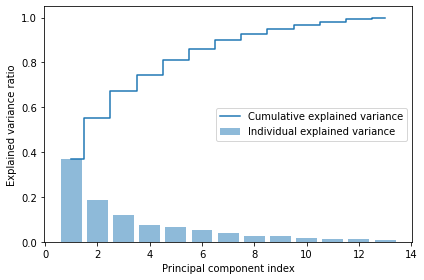

In [4]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

그래프를 보면, 첫 번째 주성분이 거의 분산의 40%를 커버한다.<br>
그리고 처음 두 개의 주성분이 대략 60%를 설명한다.

<br>

---

<br>